In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [2]:
global G,c
G=6.67e-8
c=3e10

In [3]:
file_path = "D:\\DEBADES SIR;S PAPERS\\Slowly rotating neutron star\\SLy.txt"

In [4]:
sly=np.genfromtxt(file_path,delimiter='')

rhos=sly[:,2] # in gm/cm^3
Ps=sly[:,3]   # in dyn/cm^2

In [5]:
print(sly)

[[6.000e+00 2.720e-14 4.510e+01 1.700e+14]
 [7.000e+00 1.270e-13 2.120e+02 5.820e+15]
 [8.000e+00 6.930e-13 1.150e+03 1.900e+17]
 [1.000e+00 6.295e-12 1.044e+04 9.744e+18]
 [2.000e+00 1.581e-11 2.622e+04 4.968e+19]
 [3.000e+00 3.972e-11 6.587e+04 2.431e+20]
 [4.000e+00 9.976e-11 1.654e+05 1.151e+21]
 [5.000e+00 2.506e-10 4.156e+05 5.266e+21]
 [6.000e+00 6.294e-10 1.044e+06 2.318e+22]
 [7.000e+00 1.581e-09 2.622e+06 9.755e+22]
 [8.000e+00 3.972e-09 6.588e+06 3.911e+23]
 [9.000e+00 5.000e-09 8.293e+06 5.259e+23]
 [1.000e+01 9.976e-09 1.655e+07 1.435e+24]
 [1.100e+01 1.990e-08 3.302e+07 3.833e+24]
 [1.000e+00 3.973e-08 6.592e+07 1.006e+25]
 [2.000e+00 7.926e-08 1.315e+08 2.604e+25]
 [3.000e+00 1.581e-07 2.625e+08 6.676e+25]
 [4.000e+00 1.991e-07 3.305e+08 8.738e+25]
 [5.000e+00 3.156e-07 5.239e+08 1.629e+26]
 [6.000e+00 5.001e-07 8.303e+08 3.029e+26]
 [7.000e+00 6.296e-07 1.046e+09 4.129e+26]
 [8.000e+00 9.667e-07 1.606e+09 6.860e+26]
 [9.000e+00 1.532e-06 2.545e+09 1.272e+27]
 [1.000e+01

In [6]:
cPs=CubicSpline(rhos,Ps) # Pressure is a function of density
crhos=CubicSpline(Ps,rhos) # Density is a function of pressure

In [7]:
def f(x):
    r=x[0]
    m=x[1]
    P=x[2]
    
    rho=crhos(P)
    
    dr_dr=1
    dm_dr=4*np.pi*(r**2)*rho
    dP_dr=-((G*m*rho)/(r**2))*(1+(P/(rho*c*c)))*(1+((4*np.pi*P*(r**3))/(m*c*c)))*((1-((2*G*m)/(r*c*c)))**(-1))
    
    return np.array([dr_dr,dm_dr,dP_dr])


In [8]:
def ns_solve(rho_c):
    
    h=500 # in cm
    
    P_c=cPs(rho_c)
    
    X=np.zeros([3,80000])
    
    X[:,0]=np.array([500,1,P_c])
    
    
    for i in range(1,80000):
        
        k1=f(X[:,i-1])
        k2=f(X[:,i-1]+k1*0.5*h)
        k3=f(X[:,i-1]+k2*0.5*h)
        k4=f(X[:,i-1]+k3*h)
        
        X[:,i]=X[:,i-1]+ (h*(k1+2*k2+2*k3+k4))/6
        
        
        if((X[2,i]/P_c)<1e-10):
            break
            
    return X[:,i-1]

In [9]:
rho=np.arange(2.5e14,1e15,0.5e13)
rho=np.append(rho,np.arange(1e15,4e15,0.5e14))

res_s=np.zeros([3,len(rho)])

#print(len(rho))


In [10]:
for i in range(len(rho)):
    
    res_s[:,i]=ns_solve(rho[i])
    
R_s=res_s[0,]/1e5
M_s=res_s[1,]/2e33
    
    

In [11]:
print(R_s)

[21.365 20.455 19.66  18.955 18.33  17.775 17.28  16.835 16.435 16.07
 15.745 15.445 15.175 14.925 14.695 14.485 14.295 14.12  13.955 13.805
 13.665 13.54  13.42  13.315 13.21  13.12  13.03  12.95  12.875 12.81
 12.745 12.685 12.63  12.575 12.53  12.485 12.44  12.4   12.365 12.33
 12.3   12.27  12.24  12.215 12.19  12.17  12.15  12.13  12.11  12.095
 12.075 12.06  12.045 12.035 12.02  12.01  12.    11.99  11.98  11.97
 11.96  11.955 11.945 11.94  11.935 11.93  11.92  11.915 11.91  11.905
 11.9   11.9   11.895 11.89  11.885 11.885 11.88  11.875 11.875 11.87
 11.87  11.865 11.865 11.86  11.86  11.855 11.855 11.85  11.85  11.845
 11.845 11.845 11.84  11.84  11.835 11.835 11.835 11.83  11.83  11.825
 11.825 11.825 11.82  11.82  11.815 11.815 11.815 11.81  11.81  11.805
 11.805 11.8   11.8   11.795 11.795 11.79  11.79  11.785 11.785 11.78
 11.78  11.775 11.775 11.77  11.765 11.765 11.76  11.76  11.755 11.75
 11.75  11.745 11.745 11.74  11.735 11.735 11.73  11.725 11.725 11.72
 11.715 11.71 

In [12]:
print(M_s)

[0.14158933 0.14644391 0.1514632  0.15664191 0.16197556 0.16746061
 0.17309438 0.17887501 0.18480137 0.19087296 0.19708975 0.20345211
 0.20996063 0.21661595 0.22341856 0.23036861 0.23746564 0.24470833
 0.25209418 0.25961914 0.26727724 0.27506218 0.28296811 0.29098968
 0.29912199 0.30736054 0.31570122 0.32414028 0.33267423 0.34129987
 0.35001415 0.35881421 0.36769723 0.37666043 0.38570098 0.39481595
 0.40400221 0.41325634 0.42257478 0.43195415 0.44139138 0.4508836
 0.46042815 0.47002257 0.47966452 0.48935179 0.49908226 0.50885386
 0.51866454 0.52851224 0.53839484 0.54831017 0.55825592 0.56822963
 0.57822868 0.58825013 0.59829082 0.60834766 0.6184178  0.62849853
 0.63858732 0.64868179 0.65877968 0.66887886 0.67897731 0.68907309
 0.69916433 0.70924923 0.71932606 0.72939308 0.73944861 0.74949096
 0.75951842 0.76952928 0.77952168 0.78949375 0.79944373 0.80936998
 0.81927094 0.82914517 0.83899128 0.84880796 0.858594   0.8683482
 0.87806943 0.88775661 0.89740868 0.90702462 0.91660341 0.926144

In [18]:
#print(res_s)

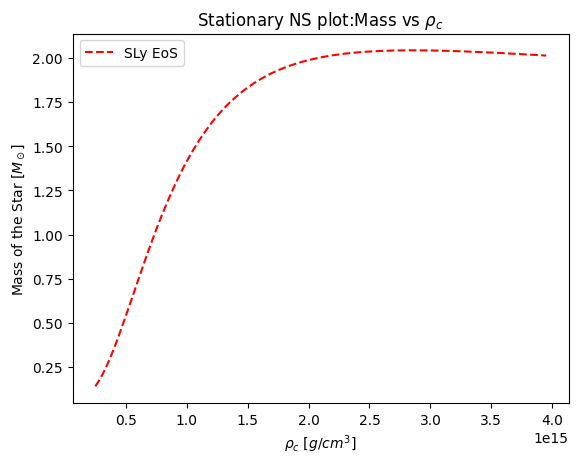

In [13]:
plt.figure()
ax=plt.gca()
ax.set_title(r"Stationary NS plot:Mass vs $\rho_c$")
ax.set_xlabel(r"$\rho_c$ [$g/cm^3$]")
ax.set_ylabel(r"Mass of the Star [$M_\odot$]")
plt.plot(rho,M_s,"r--",label="SLy EoS")

plt.legend(loc="best")
plt.show()


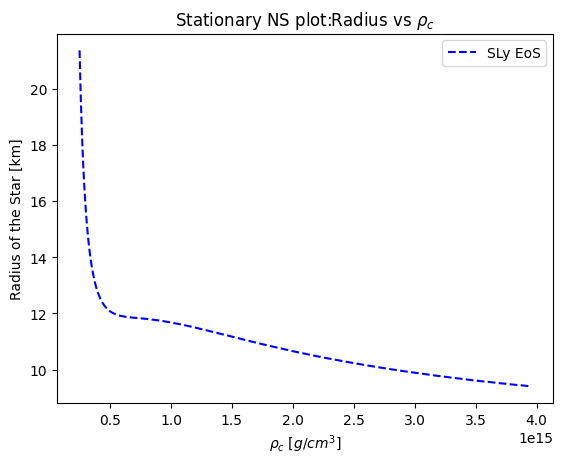

In [14]:
plt.figure()
ax=plt.gca()
ax.set_title(r"Stationary NS plot:Radius vs $\rho_c$")
ax.set_xlabel(r"$\rho_c$ [$g/cm^3$]")
ax.set_ylabel(r"Radius of the Star [km]")
plt.plot(rho,R_s,"b--",label="SLy EoS")

plt.legend(loc="best")
plt.show()

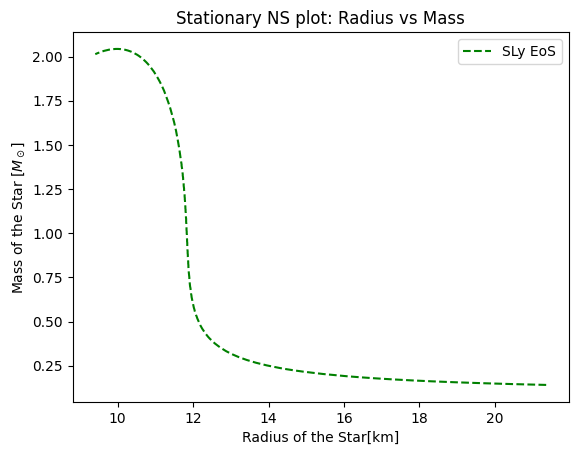

In [16]:
plt.figure()
ax=plt.gca()
ax.set_title(r"Stationary NS plot: Radius vs Mass")
ax.set_xlabel(r"Radius of the Star[km]")
ax.set_ylabel(r"Mass of the Star [$M_\odot$]")
plt.plot(R_s,M_s,"g--",label="SLy EoS")

plt.legend(loc="best")
plt.show()